In [36]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# mathematical computations
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import tensorflow as tf
from tensorflow_graph_in_jupyter import show_graph

In [2]:
tf.__version__

'1.15.0'

In [3]:
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [4]:
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
per_clf.fit(X, y)

Perceptron(max_iter=100, random_state=42, tol=-inf)

One of the approaches to plot decision boundaries (both for a linear or non-linear classifier) is to sample points in a uniform grid and feed them to the classifier. Asumming `X` is your data, you can create a uniform grid of points as follows:

    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Then, you feed those coordinates to your perceptron to capture their prediction:

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Assuming `clf` is your Perceptron, the `np.c_` creates features from the uniformly sampled points, feeds them to the classifier and captures in `Z` their prediction.

Finally, plot the decision boundaries as a contour plot (using matplotlib):
    
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

And optionally, plot also your data points:

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

[Fully working example](https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html), and credits for the example goes to [scikit-learn](http://scikit-learn.org/stable/) (which btw, is a great machine learning library with a fully working Perceptron implemented). 


([], [])

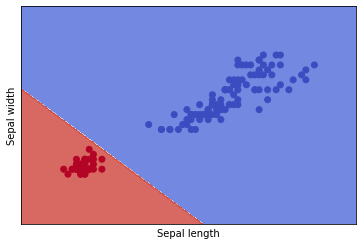

In [5]:
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = per_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

# Activation Functions

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

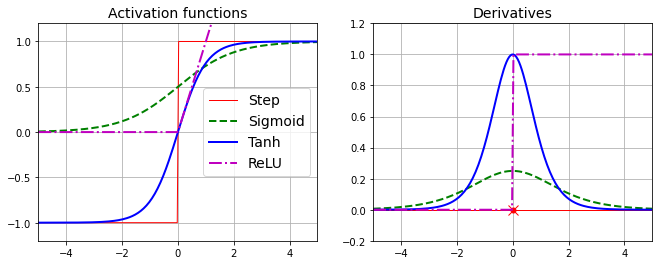

In [7]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

# save_fig("activation_functions_plot")
plt.show()

In [8]:

def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

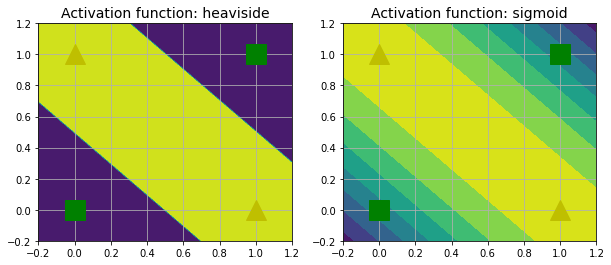

In [9]:

x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

In [10]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [11]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpqkirqrit', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2f0e973400>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_value. Vari

INFO:tensorflow:loss = 2.943529, step = 4201 (0.344 sec)
INFO:tensorflow:global_step/sec: 226.714
INFO:tensorflow:loss = 0.5636132, step = 4301 (0.442 sec)
INFO:tensorflow:global_step/sec: 248.236
INFO:tensorflow:loss = 3.8427112, step = 4401 (0.402 sec)
INFO:tensorflow:global_step/sec: 300.872
INFO:tensorflow:loss = 1.3842174, step = 4501 (0.333 sec)
INFO:tensorflow:global_step/sec: 272.795
INFO:tensorflow:loss = 3.6460547, step = 4601 (0.367 sec)
INFO:tensorflow:global_step/sec: 276.11
INFO:tensorflow:loss = 1.2086492, step = 4701 (0.362 sec)
INFO:tensorflow:global_step/sec: 296.663
INFO:tensorflow:loss = 1.4900583, step = 4801 (0.337 sec)
INFO:tensorflow:global_step/sec: 278.532
INFO:tensorflow:loss = 1.8698765, step = 4901 (0.360 sec)
INFO:tensorflow:global_step/sec: 247.1
INFO:tensorflow:loss = 0.0908091, step = 5001 (0.404 sec)
INFO:tensorflow:global_step/sec: 292.808
INFO:tensorflow:loss = 0.68684673, step = 5101 (0.342 sec)
INFO:tensorflow:global_step/sec: 294.768
INFO:tensorfl

INFO:tensorflow:global_step/sec: 296.271
INFO:tensorflow:loss = 0.28913036, step = 12501 (0.338 sec)
INFO:tensorflow:global_step/sec: 299.586
INFO:tensorflow:loss = 0.2795389, step = 12601 (0.334 sec)
INFO:tensorflow:global_step/sec: 306.006
INFO:tensorflow:loss = 0.03946201, step = 12701 (0.327 sec)
INFO:tensorflow:global_step/sec: 296.697
INFO:tensorflow:loss = 0.13592222, step = 12801 (0.337 sec)
INFO:tensorflow:global_step/sec: 300.142
INFO:tensorflow:loss = 0.0939644, step = 12901 (0.333 sec)
INFO:tensorflow:global_step/sec: 306.88
INFO:tensorflow:loss = 0.18280774, step = 13001 (0.326 sec)
INFO:tensorflow:global_step/sec: 306.869
INFO:tensorflow:loss = 0.29200196, step = 13101 (0.326 sec)
INFO:tensorflow:global_step/sec: 298.37
INFO:tensorflow:loss = 0.110428326, step = 13201 (0.335 sec)
INFO:tensorflow:global_step/sec: 303.077
INFO:tensorflow:loss = 0.16790596, step = 13301 (0.330 sec)
INFO:tensorflow:global_step/sec: 303.097
INFO:tensorflow:loss = 0.0734142, step = 13401 (0.330

INFO:tensorflow:loss = 0.035264116, step = 20601 (0.337 sec)
INFO:tensorflow:global_step/sec: 307.002
INFO:tensorflow:loss = 0.082280144, step = 20701 (0.326 sec)
INFO:tensorflow:global_step/sec: 306.892
INFO:tensorflow:loss = 0.1809767, step = 20801 (0.326 sec)
INFO:tensorflow:global_step/sec: 297.485
INFO:tensorflow:loss = 0.26673606, step = 20901 (0.336 sec)
INFO:tensorflow:global_step/sec: 296.921
INFO:tensorflow:loss = 0.1111794, step = 21001 (0.337 sec)
INFO:tensorflow:global_step/sec: 299.404
INFO:tensorflow:loss = 0.032266073, step = 21101 (0.334 sec)
INFO:tensorflow:global_step/sec: 284.467
INFO:tensorflow:loss = 0.1314314, step = 21201 (0.351 sec)
INFO:tensorflow:global_step/sec: 294.308
INFO:tensorflow:loss = 0.08799006, step = 21301 (0.340 sec)
INFO:tensorflow:global_step/sec: 302.158
INFO:tensorflow:loss = 0.030118031, step = 21401 (0.331 sec)
INFO:tensorflow:global_step/sec: 215.327
INFO:tensorflow:loss = 0.0008163851, step = 21501 (0.464 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:loss = 0.010904241, step = 28701 (0.334 sec)
INFO:tensorflow:global_step/sec: 310.343
INFO:tensorflow:loss = 0.016548371, step = 28801 (0.323 sec)
INFO:tensorflow:global_step/sec: 302.582
INFO:tensorflow:loss = 0.025402531, step = 28901 (0.329 sec)
INFO:tensorflow:global_step/sec: 308.762
INFO:tensorflow:loss = 0.06471728, step = 29001 (0.324 sec)
INFO:tensorflow:global_step/sec: 304.851
INFO:tensorflow:loss = 0.010698732, step = 29101 (0.328 sec)
INFO:tensorflow:global_step/sec: 309.237
INFO:tensorflow:loss = 0.0017385953, step = 29201 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.385
INFO:tensorflow:loss = 0.091690525, step = 29301 (0.321 sec)
INFO:tensorflow:global_step/sec: 304.749
INFO:tensorflow:loss = 0.012703968, step = 29401 (0.328 sec)
INFO:tensorflow:global_step/sec: 309.349
INFO:tensorflow:loss = 0.11818592, step = 29501 (0.324 sec)
INFO:tensorflow:global_step/sec: 300.001
INFO:tensorflow:loss = 0.013750544, step = 29601 (0.333 sec)
INFO:tensorflow:global

INFO:tensorflow:global_step/sec: 304.613
INFO:tensorflow:loss = 0.014731894, step = 36801 (0.328 sec)
INFO:tensorflow:global_step/sec: 301.152
INFO:tensorflow:loss = 0.009736104, step = 36901 (0.332 sec)
INFO:tensorflow:global_step/sec: 308.094
INFO:tensorflow:loss = 0.03672275, step = 37001 (0.325 sec)
INFO:tensorflow:global_step/sec: 310.262
INFO:tensorflow:loss = 0.0014121657, step = 37101 (0.322 sec)
INFO:tensorflow:global_step/sec: 304.453
INFO:tensorflow:loss = 0.040649623, step = 37201 (0.328 sec)
INFO:tensorflow:global_step/sec: 302.965
INFO:tensorflow:loss = 0.012852546, step = 37301 (0.330 sec)
INFO:tensorflow:global_step/sec: 308.248
INFO:tensorflow:loss = 0.01624645, step = 37401 (0.324 sec)
INFO:tensorflow:global_step/sec: 306.913
INFO:tensorflow:loss = 0.008104188, step = 37501 (0.326 sec)
INFO:tensorflow:global_step/sec: 310.261
INFO:tensorflow:loss = 0.030872477, step = 37601 (0.323 sec)
INFO:tensorflow:global_step/sec: 309.517
INFO:tensorflow:loss = 0.02365884, step = 

In [12]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-22T21:35:49Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpqkirqrit/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-08-22-21:35:50
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9798, average_loss = 0.10684631, global_step = 44000, loss = 13.52485
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: /tmp/tmpqkirqrit/model.ckpt-44000


In [13]:
eval_results

{'accuracy': 0.9798,
 'average_loss': 0.10684631,
 'loss': 13.52485,
 'global_step': 44000}

In [14]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpqkirqrit/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([-15.143217  ,   2.7581725 ,   1.6812178 ,  -0.07759959,
        -11.454715  , -12.31644   , -32.149864  ,  19.883001  ,
        -10.245515  ,  -2.1354291 ], dtype=float32),
 'probabilities': array([6.14195501e-16, 3.65410955e-08, 1.24470256e-08, 2.14398033e-09,
        2.45585785e-14, 1.03743494e-14, 2.52588055e-23, 1.00000000e+00,
        8.22907958e-14, 2.73852718e-10], dtype=float32),
 'class_ids': array([7]),
 'classes': array([b'7'], dtype=object),
 'all_class_ids': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
 'all_classes': array([b'0', b'1', b'2', b'3', b'4', b'5', b'6', b'7', b'8', b'9'],
       dtype=object)}

# Using legacy tensowflow 

In [15]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [16]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [17]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [18]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [19]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [20]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [21]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [22]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [23]:
n_epochs = 40
batch_size = 50

In [24]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [25]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Val accuracy: 0.9148
1 Batch accuracy: 0.92 Val accuracy: 0.9358
2 Batch accuracy: 0.96 Val accuracy: 0.9448
3 Batch accuracy: 0.92 Val accuracy: 0.951
4 Batch accuracy: 0.98 Val accuracy: 0.956
5 Batch accuracy: 0.96 Val accuracy: 0.9568
6 Batch accuracy: 1.0 Val accuracy: 0.9614
7 Batch accuracy: 0.96 Val accuracy: 0.963
8 Batch accuracy: 0.98 Val accuracy: 0.965
9 Batch accuracy: 0.96 Val accuracy: 0.9658
10 Batch accuracy: 0.92 Val accuracy: 0.9684
11 Batch accuracy: 0.98 Val accuracy: 0.9688
12 Batch accuracy: 0.98 Val accuracy: 0.9666
13 Batch accuracy: 0.98 Val accuracy: 0.9706
14 Batch accuracy: 1.0 Val accuracy: 0.9712
15 Batch accuracy: 0.94 Val accuracy: 0.9734
16 Batch accuracy: 1.0 Val accuracy: 0.9738
17 Batch accuracy: 1.0 Val accuracy: 0.9742
18 Batch accuracy: 1.0 Val accuracy: 0.9748
19 Batch accuracy: 0.98 Val accuracy: 0.9744
20 Batch accuracy: 1.0 Val accuracy: 0.9752
21 Batch accuracy: 1.0 Val accuracy: 0.9758
22 Batch accuracy: 0.98 Val accu


# Using dense() instead of neuron_layer()
Note: previous releases of the book used tensorflow.contrib.layers.fully_connected() rather than tf.layers.dense() (which did not exist when this chapter was written). It is now preferable to use tf.layers.dense(), because anything in the contrib module may change or be deleted without notice. The dense() function is almost identical to the fully_connected() function, except for a few minor differences:

- several parameters are renamed: scope becomes name, activation_fn becomes activation (and similarly the _fn suffix is removed - from other parameters such as normalizer_fn), weights_initializer becomes kernel_initializer, etc.
- the default activation is now None rather than tf.nn.relu.
- a few more differences are presented in chapter 11.

In [37]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [26]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [27]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [28]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [29]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [30]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [31]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [32]:
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Validation accuracy: 0.9024
1 Batch accuracy: 0.92 Validation accuracy: 0.9254
2 Batch accuracy: 0.94 Validation accuracy: 0.9372
3 Batch accuracy: 0.9 Validation accuracy: 0.9414
4 Batch accuracy: 0.94 Validation accuracy: 0.9472
5 Batch accuracy: 0.94 Validation accuracy: 0.9514
6 Batch accuracy: 1.0 Validation accuracy: 0.9548
7 Batch accuracy: 0.94 Validation accuracy: 0.961
8 Batch accuracy: 0.96 Validation accuracy: 0.9622
9 Batch accuracy: 0.94 Validation accuracy: 0.9648
10 Batch accuracy: 0.92 Validation accuracy: 0.9654
11 Batch accuracy: 0.98 Validation accuracy: 0.9668
12 Batch accuracy: 0.98 Validation accuracy: 0.968
13 Batch accuracy: 0.98 Validation accuracy: 0.9702
14 Batch accuracy: 1.0 Validation accuracy: 0.9698
15 Batch accuracy: 0.94 Validation accuracy: 0.9718
16 Batch accuracy: 0.98 Validation accuracy: 0.9726
17 Batch accuracy: 1.0 Validation accuracy: 0.9726
18 Batch accuracy: 0.98 Validation accuracy: 0.9746
19 Batch accuracy: 0.98 Valid

In [37]:
show_graph(tf.get_default_graph())